## Overview of the Dataset



The dataset contains health insurance records for a group of individuals, with the following column descriptions:

1. age: The age of the insured individual.
2. sex: The gender of the insured individual.
3. bmi: Body Mass Index, a measure of body fat based on height and weight.
4. children: Number of dependents covered by the insurance.
5. smoker: Indicates whether the individual is a smoker.
6. region: The region in which the individual resides.
7. charges: The insurance charge billed to the individual.

In order to effectively analyse the dataset the Group 4 carried out the following  analytical steps:
- Data Loading: imported the necessary libraries and Loaded the dataset into Jupyter notebook.
- Data Exploration and Preprocessing: Handle missing values, outliers, and inconsistencies in the data. Gain insights into the data, identify patterns, and check for anomalies. Create new features or transform existing ones to improve model performance.  Scale or normalize the features to a common range to improve model performance. Select the most relevant features to reduce dimensionality and improve model efficiency
- Model Deployment: Deployed 3 models, which are Multiple Linear Regression, Support Vector Machine and Random Forest.
- Model Training and Evaluation: Train and evaluate machine learning models using the selected features. Compare the models using appropriate regression metrics such as RMSE, MAE, and Rsquared.  Use Recursive Feature Elimination (RFE) or another feature selection method to identify the
most important feature .
• Perform hyperparameter tuning using GridSearch or another hyperparameter tuning met od
to optimize the mo-
- Domain and Ethical Implications: Discuss how the models can be applied in the context of your chosen dataset 
• Explore potential impacts and applications of your findings in business or research scenarios 
• Analyse ethical considerations related to your dataset and predictive modelling. Addre s
issues such as data privacy, informed consent, and the potential consequences of mo el
predictionsdels

# 1. Loading Libraries and Dataset

In [4]:
# Import necessary libraries to aid analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Optional for better plot visuals
%matplotlib inline
sns.set(style='whitegrid')

In [5]:
# Loading the dataset 
df = pd.read_csv('insurance.csv')

# 2. Data Exploration and Preprocessing

In [7]:
# displaying the 1st five columns of the dataset
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# displaying the 1st five columns of the dataset
print("Last 5 Rows of the Dataset:")
df.tail()

Last 5 Rows of the Dataset:


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
# number of rows and columns in the dataset
print(f"The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe contains 1338 rows and 7 columns


In [10]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Statistical summary of the numeric columns in the dataset
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# checking for null values in each row
print("\nNull values in each row:")
df.isnull().sum()


Null values in each row:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# checking for null alues in each row using boolean 
print("\nDoes any row contain null values?")
df.isna().any()


Does any row contain null values?


age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [14]:
# check if there are any NaN values in the entire DataFrame.
print("\nDoes the df contain any null values?")
df.isnull().any().any()


Does the df contain any null values?


False

In [15]:
# display only the rows containing NaN values
print("\nChecking for null values in the df")
df[df.isnull().any(axis=1)]


Checking for null values in the df


,age,sex,bmi,children,smoker,region,charges


In [16]:
# identifying duplicates in the dataset
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 1


In [17]:
# displaying the duplicate rows
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
# dropping one of duplicate rows
df.drop_duplicates(inplace=True)

In [19]:
# confirming one of the duplicate rows is deleted or dropped
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


## 2.1 Exploring individual columns/features/labels

### 2.1.1 Age Column

In [22]:
# number of unique age values 
print(f"The age column contains {df['age'].nunique()} unique values")

The age column contains 47 unique values


In [23]:
# displaying the unique age value
print("\nDisplaying the unique values in the age column?")
df['age'].unique()


Displaying the unique values in the age column?


array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [24]:
df['age'].value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [25]:
# minimum and maximum age
print("\nThe minimum age is:")
print(df['age'].min())
print("\nThe maximum age is:")
print(df['age'].max())


The minimum age is:
18

The maximum age is:
64


### 2.1.2 Sex Column

In [27]:
# unique sex values
print(f"The sex column contains {df['sex'].nunique()} unique genders comprising {df['sex'].unique()}")

The sex column contains 2 unique genders comprising ['female' 'male']


### 2.1.3 BMI Column

In [29]:
# displaying the unique bmi values
print(f"The dataframe contains {df['bmi'].nunique()} unique values")
print("\nDisplaying the unique bmi values ")
df['bmi'].unique()

The dataframe contains 548 unique values

Displaying the unique bmi values 


array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

### 2.1.4 Children Column

In [31]:
# unique values in the children column
print(f"The children column contains {df['children'].nunique()} unique values comprising {df['children'].unique()}")

The children column contains 6 unique values comprising [0 1 3 2 5 4]


### 2.1.5 Smokers Column

In [33]:
# unique values in he smoker's column
print(df['smoker'].unique())
print(f"The smoker's column contains {df['smoker'].nunique()} unique values comprising smokers indicated as \
{df['smoker'].unique()[0]} and non-smokers indicated as {df['smoker'].unique()[1]}")

['yes' 'no']
The smoker's column contains 2 unique values comprising smokers indicated as yes and non-smokers indicated as no


### 2.1.6 Region

In [35]:
# unique values in the region column
print(f"There are {df['region'].nunique()} unique region comprising: {df['region'].unique()}")

There are 4 unique region comprising: ['southwest' 'southeast' 'northwest' 'northeast']


## 2.2 Gaphical EDA

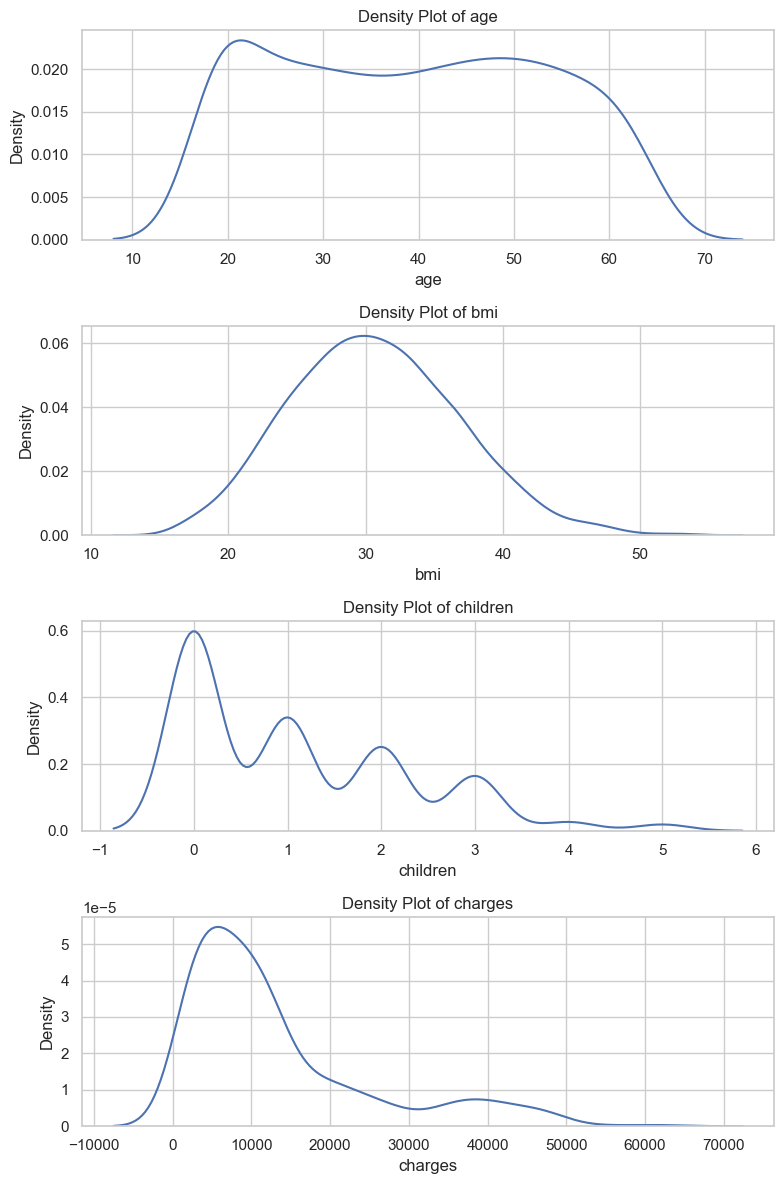

In [37]:
# Select only numeric columns to display the data distribution plot
numeric_cols = df.select_dtypes(include=['number'])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), figsize=(8, 12))

# Iterate over each numeric column and plot a density plot
for i, col in enumerate(numeric_cols.columns):
    sns.kdeplot(data=numeric_cols, x=col, ax=axes[i])
    axes[i].set_title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

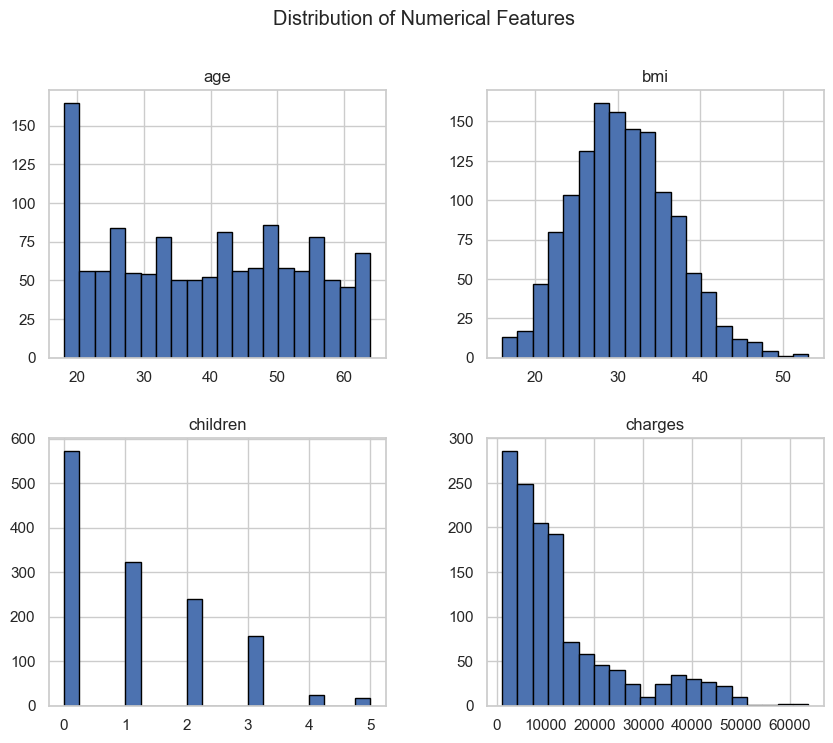

In [38]:
# Histogram of numerical columns
df.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

From the histogram the age is spread from about 20 years to over 60 years. With more people in the 20s. BMI column has a normal distribution and thus follows the 68–95–99.7 rule, which states that 68% of our dataset lies within 1 standard deviation from the mean. About 95% of the dataset lies between standard deviation from the mean and 99.7 of our dataset lies within 3 standard deviation of the dataset

For children, people with 0-2 children are more compared with people with 3 or more children

The plot shows that a good number of people pay lower charge but a few pay higher charges and these charges fall within the outlier region of the dataset
 

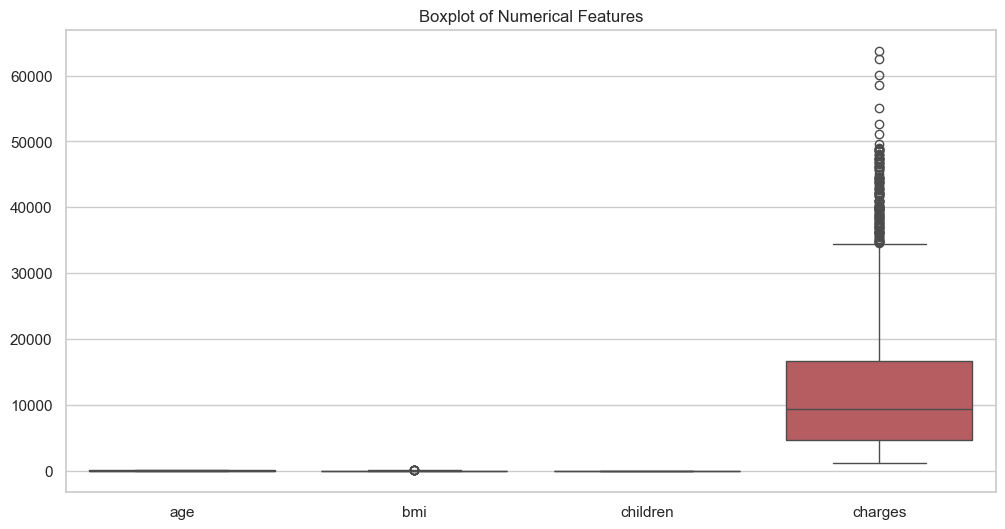

In [40]:
# Boxplot for numerical columns in the dataset to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title('Boxplot of Numerical Features')
plt.show()

Outliers can be identified in the bmi and charges columns. However, the outliers were not deleted because there is a possibility for people with high bmi to pay more medical charges due to the health challenges they might have. Also this will not affect our prediction because standard scalar that is not affected by outliers will be used to scale the data.

<Axes: >

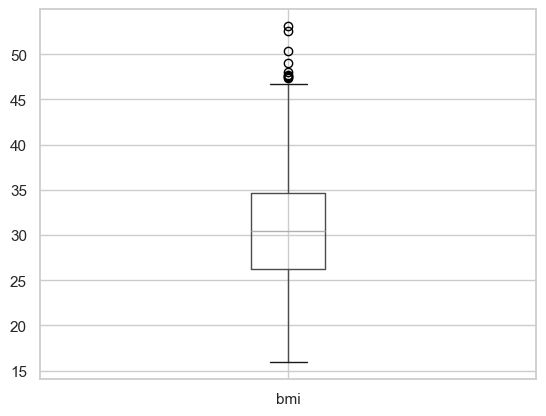

In [42]:
# box plot for bmi
df.boxplot(column='bmi')

<Axes: >

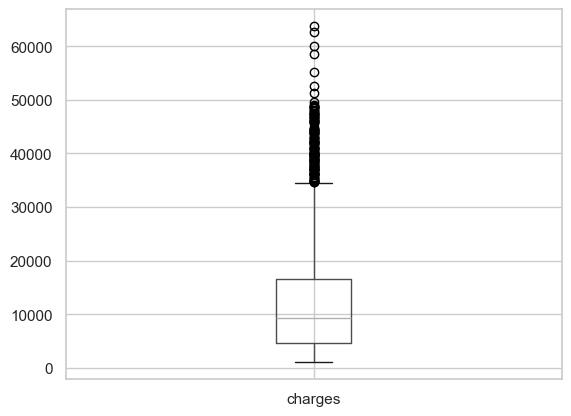

In [43]:
df.boxplot(column='charges')

In [44]:
# outliers df in charges that are greater than $34,000
outlier_charges = df[df['charges']> 34000]
print(f"The dataframe contains {outlier_charges.shape[0]} rows and {outlier_charges.shape[1]} columns")
outlier_charges

The dataframe contains 144 rows and 7 columns


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [45]:
# outliers fdf in the bmi 
outlier_bmi = df[df['bmi']> 47]
print(f"The dataframe contains {outlier_bmi.shape[0]} rows and {outlier_bmi.shape[1]} columns")
outlier_bmi

The dataframe contains 9 rows and 7 columns


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


Bar charts of the categorical columns


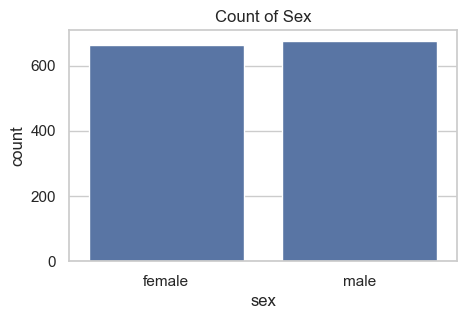

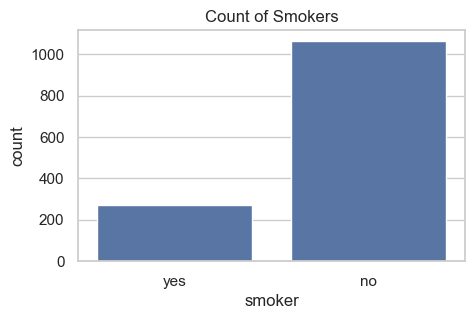

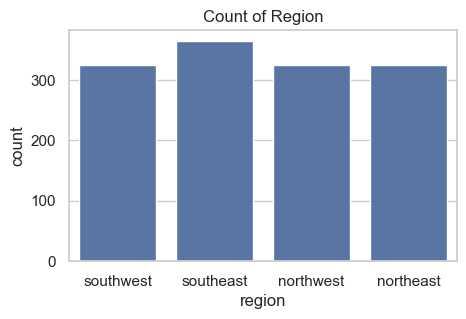

In [46]:
# Count plots for categorical features
print('Bar charts of the categorical columns')
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='sex')
plt.title('Count of Sex')

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='smoker')
plt.title('Count of Smokers')

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='region')
plt.title('Count of Region')
plt.show()


From the bar charts sex has a balance data,while smokers is inbalance with over 1000 smokers and about 250 smokers. The regoins seems to be even apart from southeast which has a higher count

In [48]:
# Correlation on numerical columns only
numerical_data = df.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


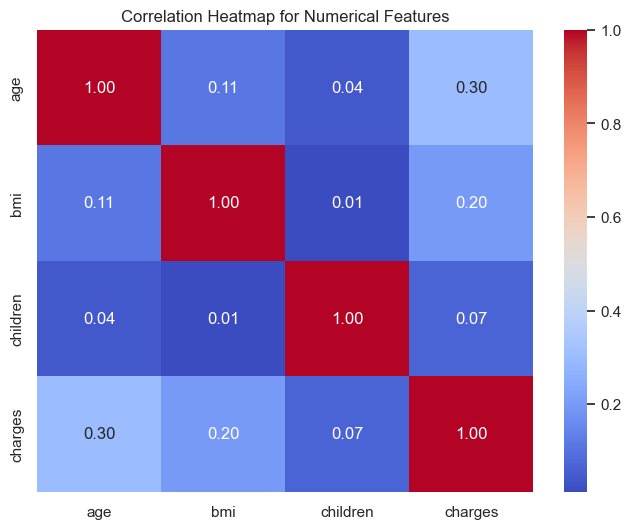

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

The correlation plot shows that age and bmi are more correleated with charges. Though correlation is not causation 

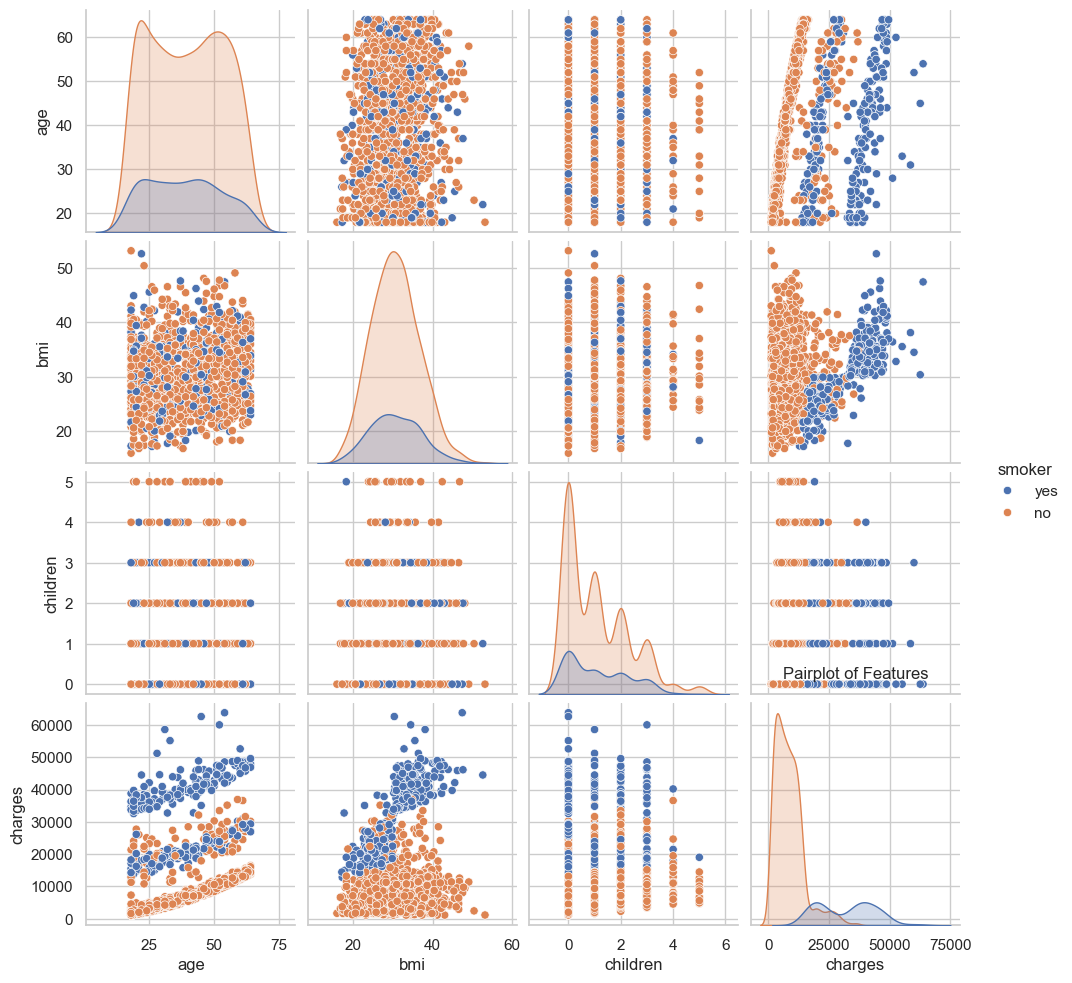

In [51]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='smoker')
plt.title('Pairplot of Features')
plt.show()

Smokers who are older and and have high bmi tend to pay more medical charges as seen in he pairwise plot

In [53]:
# displaying the first 5 rows of our data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
df['bmi'].max()

53.13

# 3. Feature Enginering

## 3.1 bmi_category feature

In [57]:
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 24.9, 29.9, 54],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [58]:
df['bmi_category']

0       Overweight
1            Obese
2            Obese
3           Normal
4       Overweight
           ...    
1333         Obese
1334         Obese
1335         Obese
1336    Overweight
1337    Overweight
Name: bmi_category, Length: 1337, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

## 3.2 age_group feature

In [60]:
df['age_group'] = pd.cut(
    df['age'], 
    bins=[17, 19, 35, 45, 55, 65], 
    labels=['teenager', 'youth', 'young adult', 'adult', 'older adult']
)


In [61]:
df['age_group']

0          teenager
1          teenager
2             youth
3             youth
4             youth
           ...     
1333          adult
1334       teenager
1335       teenager
1336          youth
1337    older adult
Name: age_group, Length: 1337, dtype: category
Categories (5, object): ['teenager' < 'youth' < 'young adult' < 'adult' < 'older adult']

## 3.3 high_risk feature

In [63]:
df['high_risk'] = ((df['smoker'] == 'yes') & (df['bmi'] > 30)).astype(int)
df['high_risk']

0       0
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    0
Name: high_risk, Length: 1337, dtype: int32

In [64]:
# dropping age and bmi columns after feature engineering to avoid multicollinearity in the model
df.drop(columns=['age', 'bmi'], inplace=True)
df.head()

,sex,children,smoker,region,charges,bmi_category,age_group,high_risk
0,female,0,yes,southwest,16884.92400,Overweight,teenager,0
1,male,1,no,southeast,1725.55230,Obese,teenager,0
2,male,3,no,southeast,4449.46200,Obese,youth,0
3,male,0,no,northwest,21984.47061,Normal,youth,0
4,male,0,no,northwest,3866.85520,Overweight,youth,0


In [65]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sex           1337 non-null   object  
 1   children      1337 non-null   int64   
 2   smoker        1337 non-null   object  
 3   region        1337 non-null   object  
 4   charges       1337 non-null   float64 
 5   bmi_category  1337 non-null   category
 6   age_group     1337 non-null   category
 7   high_risk     1337 non-null   int32   
dtypes: category(2), float64(1), int32(1), int64(1), object(3)
memory usage: 70.9+ KB


In [66]:
print(f"high_risk individuals are represented as {df['high_risk'].unique()[1]} while non high_risk individual are represented as {df['high_risk'].unique()[0]}")

high_risk individuals are represented as 1 while non high_risk individual are represented as 0


In [67]:
# first few rows of the dataset
df.head()

,sex,children,smoker,region,charges,bmi_category,age_group,high_risk
0,female,0,yes,southwest,16884.92400,Overweight,teenager,0
1,male,1,no,southeast,1725.55230,Obese,teenager,0
2,male,3,no,southeast,4449.46200,Obese,youth,0
3,male,0,no,northwest,21984.47061,Normal,youth,0
4,male,0,no,northwest,3866.85520,Overweight,youth,0


In [68]:
# shape of the dataset
df.shape

(1337, 8)

In [69]:
# columns in the dataset
df.columns

Index(['sex', 'children', 'smoker', 'region', 'charges', 'bmi_category',
       'age_group', 'high_risk'],
      dtype='object')

# 4 Data Preprocessing

In [71]:
# Separate features and target variable
X = df.drop(columns=['charges'])  # 'charges' is the target
y = df['charges']

In [72]:
# Identify numerical and categorical columns
numerical_features = ['children', 'high_risk']
categorical_features = ['sex', 'smoker', 'region', 'bmi_category', 'age_group']


In [73]:
# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

In [74]:
# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


### Printing the Numerical & categorical columns after standardization and splitting 

In [76]:
# Step 1: Extract feature names
# Numerical feature names (remain the same)
numerical_feature_names = numerical_features

# Categorical feature names (one-hot encoded)
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Step 2: Create a DataFrame for the preprocessed training data
X_train_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)

# Step 3: Create a DataFrame for the preprocessed test data
X_test_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)


In [77]:
# Display the first 5 rows of the preprocessed Training Dataset
X_train_df.head()

,children,high_risk,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_group_older adult,age_group_teenager,age_group_young adult,age_group_youth
0,-0.907908,-0.331772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.766904,-0.331772,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.766904,-0.331772,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.907908,-0.331772,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.766904,-0.331772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# shape of the train preprocessed dataset
X_train_df.shape

(1069, 14)

In [79]:
# Display the first 5 rows of the preprocessed Test Dataset
# shape of the train preprocessed datasetX_test_df.head()

In [80]:
# shape of the test preprocessed dataset
X_test_df.shape

(268, 14)

# 5 Model Development

## 5.1  Recursive Feature Elimination

In [83]:
# Recursive Feature Elimination
linear_regressor = LinearRegression()
rfe = RFE(estimator=linear_regressor, n_features_to_select=5)
rfe.fit(X_train_preprocessed, y_train)

# Selected features
selected_features_mask = rfe.support_
selected_features_mask

array([False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True])

## 5.2 Model Initialization

In [85]:
# Define models 
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [86]:
# Defining the  hyperparameters
param_grids = {
    'Support Vector Regression': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}

## 5.3 Hyperparameter Tunning with Cross Validation

In [88]:
# Hyperparameter tuning and cross-validation
best_params = {}
best_scores = {}

for name, model in models.items():
    if name in param_grids:  # Check if the model has a hyperparameter grid
        grid_search = GridSearchCV(
            model, 
            param_grids[name], 
            cv=5,  # 5-fold cross-validation
            scoring='neg_mean_squared_error'
        )
        grid_search.fit(X_train_preprocessed[:, selected_features_mask], y_train)
        best_params[name] = grid_search.best_params_
        best_scores[name] = np.sqrt(-grid_search.best_score_)  # Convert negative MSE to RMSE
    else:
        # For models without hyperparameters (e.g., Linear Regression)
        scores = cross_val_score(
            model, 
            X_train_preprocessed[:, selected_features_mask], 
            y_train, 
            cv=5,  # 5-fold cross-validation
            scoring='neg_mean_squared_error'
        )
        best_scores[name] = np.sqrt(-np.mean(scores))  # Convert negative MSE to RMSE


In [89]:
best_params

{'Support Vector Regression': {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'},
 'Random Forest': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 50}}

In [90]:
best_scores

{'Multiple Linear Regression': 4744.988252291151,
 'Support Vector Regression': 9405.196098247787,
 'Random Forest': 4767.046782876264}

## 5.4 Model Evaluation

In [92]:
# Evaluate optimized models on the test set
evaluation_results = {}

for name, model in models.items():
    if name in best_params:
        model.set_params(**best_params[name])  # Apply best parameters if available
    model.fit(X_train_preprocessed[:, selected_features_mask], y_train)
    y_pred = model.predict(X_test_preprocessed[:, selected_features_mask])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[name] = {'RMSE': rmse, 'MAE': mae, 'R^2': r2}

In [93]:
evaluation_results

{'Multiple Linear Regression': {'RMSE': 4545.802555649511,
  'MAE': 2719.7916895599687,
  'R^2': 0.8875448220836523},
 'Support Vector Regression': {'RMSE': 9942.543443383742,
  'MAE': 6862.248025102402,
  'R^2': 0.46203587544483415},
 'Random Forest': {'RMSE': 4534.4811155138905,
  'MAE': 2711.5297571062806,
  'R^2': 0.8881042696781247}}

## 5.5 Feature Importance

In [95]:
# Feature importance for Random Forest
if 'Random Forest' in models:
    rf_model = RandomForestRegressor(**best_params.get('Random Forest', {}), random_state=42)
    rf_model.fit(X_train_preprocessed[:, selected_features_mask], y_train)
    feature_importances = rf_model.feature_importances_

    # Combine numerical and categorical feature names
    numerical_feature_names = numerical_features
    categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
    all_features = list(numerical_feature_names) + list(categorical_feature_names)

    # Filter selected feature names
    selected_feature_names = [feature for feature, selected in zip(all_features, selected_features_mask) if selected]

    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'Feature': selected_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance (Random Forest):")
    print(importance_df)


Feature Importance (Random Forest):
                 Feature  Importance
0              high_risk    0.760054
1             smoker_yes    0.130344
4        age_group_youth    0.043129
2     age_group_teenager    0.041288
3  age_group_young adult    0.025185


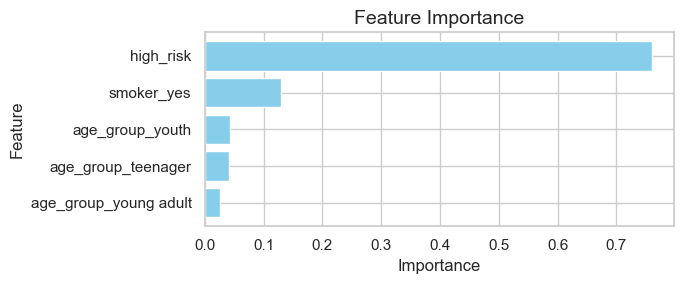

In [96]:
# Create a bar chart for feature importances
plt.figure(figsize=(7, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.tight_layout()
plt.show()

## 5.6 Model Performance Summary

In [98]:
# Model performance summary
performance_summary = pd.DataFrame(evaluation_results).T.sort_values(by='RMSE')
print("\nModel Performance Summary:")
print(performance_summary)


Model Performance Summary:
                                   RMSE          MAE       R^2
Random Forest               4534.481116  2711.529757  0.888104
Multiple Linear Regression  4545.802556  2719.791690  0.887545
Support Vector Regression   9942.543443  6862.248025  0.462036


In [99]:
import joblib

# Save the Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


### Best Model: Random Forest

#### Reasons:
- Lowest RMSE: Random Forest provides the most accurate predictions. The model accounts for 89% of the total variation
- Highest R^2 : Explains the largest proportion of variance in the target variable.
- Robustness: Handles non-linear relationships and is less sensitive to noise compared to Linear Regression and SVR.

## Conclusion:
Based on the evaluation metrics, Random Forest is the best-performing model for this dataset. It balances predictive accuracy and robustness, making it an ideal choice for deployment.

# 6.  Domain and Ethical Implications

# Explanation of the Code:
* Data Exploration: We load the data, inspect its structure, and visualize distributions and correlations.
- Data Preprocessing: Categorical variables are encoded using LabelEncoder, and numerical features are scaled using StandardScaler.
+ Model Development: We implement and evaluate three models—Linear Regression, Decision Tree, and Support Vector Regression.
- Model Evaluation: Models are evaluated using metrics like RMSE, MAE, and R². We also use Recursive Feature Elimination (RFE) for feature selection.
- Hyperparameter Tuning: GridSearchCV is used to tune the Decision Tree model.
- Interpretation and Ethical Considerations: We interpret the model results, identify key features, and discuss ethical implications.

Based on the end-to-end analysis of the insurance dataset, here's a detailed discussion on the application of the models, their potential impacts, and ethical considerations.

# 1. Application of Models in the Context of the Insurance Dataset
The dataset used for this analysis pertains to predicting medical insurance costs based on various factors such as age, BMI, smoking status, and region. The models developed (Linear Regression, Decision Tree Regression, and Support Vector Regression) can be applied to several real-world scenarios in the insurance industry:

- A. Pricing Insurance Premiums
Use Case: Insurance companies can use predictive models to determine personalized insurance premiums for clients based on their risk factors.
For example, smokers and individuals with a high BMI are likely to incur higher healthcare costs. By accurately predicting the expected charges using models like Decision Tree or Support Vector Regression, insurers can adjust premiums accordingly.
Impact: This helps insurers maintain profitability while providing customers with fair and transparent pricing based on their health profiles.
- B. Risk Assessment and Underwriting
Use Case: Insurers can assess the risk level of new applicants by analyzing the factors affecting healthcare costs.
By using the model's predictions, insurance underwriters can identify high-risk individuals who may require additional coverage or different policy terms.
Impact: This approach ensures a balanced risk pool, preventing potential financial losses due to high claims.
- C. Health and Wellness Programs
Use Case: The insights gained from the models can be applied to promote wellness programs tailored to customers’ risk profiles.
For instance, identifying that smoking status is a significant predictor of high insurance charges can lead insurers to offer incentives for smoking cessation programs.
Impact: Such initiatives can reduce overall healthcare costs for insurers and improve the health outcomes of customers, fostering customer loyalty.
# 2. Potential Impacts and Applications in Business and Research
+ A. Business Impacts
Data-Driven Decision Making: Insurance companies can leverage these models for more accurate decision-making, optimizing the pricing strategies for various customer segments.
Operational Efficiency: Automating the process of insurance premium calculation and risk assessment using machine learning models can lead to faster processing times and reduced operational costs.
Competitive Advantage: Insurers who adopt predictive modeling can gain a competitive edge by offering personalized premiums and better customer service, thus attracting more customers.
+ B. Research Applications
Healthcare Economics: Researchers can utilize the models to study the economic impact of lifestyle choices (e.g., smoking, obesity) on healthcare costs.
Public Health Policy: Insights from the dataset can inform public health interventions, helping policymakers identify high-risk groups and design targeted health campaigns to reduce healthcare costs.
# 3. Ethical Considerations in Predictive Modeling
While the application of predictive models in the insurance industry presents numerous benefits, it also raises several ethical concerns:

* A. Data Privacy
Issue: The insurance dataset contains sensitive personal information (e.g., age, smoking status, health conditions) that could be misused if not properly protected.
Solution: Implement data anonymization techniques to protect the identity of individuals. Ensure compliance with data protection regulations such as GDPR by obtaining explicit consent from individuals before collecting and using their data.
* B. Informed Consent
Issue: Customers may not be fully aware of how their data is being used, especially if predictive models are employed to influence their insurance premiums.
Solution: Insurance companies must provide clear communication regarding how customers' data will be used. Consent forms should be transparent, detailing the scope and purpose of data collection.
* C. Potential Bias and Fairness
Issue: The models may inadvertently introduce biases, particularly if sensitive attributes (like age, sex, or smoking status) are used for predictions. For example, older individuals or smokers may face disproportionately high premiums, leading to discrimination.
Solution: Implement fairness-aware machine learning practices. Techniques like Fairness Constraints or Adversarial Debiasing can be used to ensure that models do not discriminate against specific groups. Additionally, periodic audits of the model’s predictions can help identify and mitigate biases.
* D. Ethical Use of Predictions
Issue: The use of predictive models for pricing insurance can result in certain individuals being denied coverage or facing excessively high premiums due to their health profiles.
Solution: Ethical guidelines should be established to prevent the misuse of predictive modeling. Insurers should balance profitability with fairness by offering support programs for high-risk individuals, such as wellness incentives or preventive care options.
# 4. Conclusion and Recommendations
The predictive models developed in this analysis offer valuable insights into factors influencing medical insurance costs and can be applied to optimize insurance pricing, risk assessment, and customer engagement. However, it is crucial to address ethical challenges by implementing robust data privacy measures, ensuring informed consent, and actively monitoring for bias.

# Key Recommendations:
Adopt Privacy-First Data Strategies: Use techniques like data anonymization and encryption to safeguard sensitive information.
Promote Transparency: Clearly communicate how customer data will be used in predictive modeling.
Implement Fairness Audits: Regularly review models for fairness, especially when using sensitive features, to avoid discrimination.
Foster Ethical AI Practices: Develop a framework for the ethical use of AI in insurance, focusing on fairness, accountability, and transparency.
By leveraging predictive models responsibly, insurance companies can improve operational efficiency, enhance customer satisfaction, and contribute to better public health outcomes, while maintaining ethical standards.

## Reference

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.